# Exploratory Data Analysis (EDA)


## About Dataset

### Breast Cancer Dataset contains 10 columns, each are:
Class - describes if breast cancer has recurred or not

Age - describes age of patient

Menopause - describes age patient experienced menopause (if applicable)

Tumor Size - describes the size of tumor in millimeters

Invasive Nodes - describes the number of positive axillary lymph nodes (nodes to which cancer has metastasized) detected

Node Capsular Invasion - describes whether cancerous nodes exhibit capsular invasion

Degree Malignancy - describes the degree of cancer malignancy

Breast - specifies which breast was affected

Breast Quadrant - identifies the quadrant of the breast where the tumor is located

Irradiation - documents whether the patient underwent radiation therapy


### Data Preprocessing


In [ ]:
###importing libraries necessary for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###importing initial csv file containing the data and taking small sample of the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_450_FinalProject/DS_FinalProject_Data_BWT.csv')
df.sample(5)

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
61,40-49',premeno',30-34',0-2',no',2',right',right_up',yes',no-recurrence-events'
263,40-49',premeno',20-24',3-5',yes',2',right',right_up',yes',recurrence-events'
225,60-69',ge40',30-34',0-2',no',1',right',left_up',no',no-recurrence-events'
104,40-49',premeno',20-24',0-2',no',1',left',right_low',no',no-recurrence-events'
70,50-59',premeno',25-29',3-5',yes',3',left',left_low',yes',recurrence-events'


In [ ]:
###fixing typo in name of column
df=df.rename(columns={'tumer-size':'tumor-size'})

In [ ]:
###looking for presence of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [ ]:
###dropping rows containing missing data
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    object
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiate    277 non-null    object
 9   class        277 non-null    object
dtypes: object(10)
memory usage: 23.8+ KB


In [ ]:
###converting recurrence class to binary values using new column 'class_binary'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class_binary'] = label_encoder.fit_transform(df['class'])
df['node-caps_binary'] = label_encoder.fit_transform(df['node-caps'])
df.sample(3)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
280,60-69',ge40',15-19',0-2',no',3',right',left_up',yes',no-recurrence-events',0,0
122,40-49',premeno',15-19',0-2',no',2',left',left_low',no',no-recurrence-events',0,0
271,50-59',premeno',35-39',15-17',yes',3',right',right_up',no',recurrence-events',1,1


In [ ]:
###function to remove trailing quotation marks for each data point
def remove_trailing_quotes(value):
       return re.sub(r"[\"\',]+$", "", str(value))

###applies function to the relevant columns
for column in df.columns:
  df[column] = df[column].apply(remove_trailing_quotes)

In [ ]:
###describing dataset after dropping rows containing missing data
df.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
count,277,277,277,277,277,277,277,277,277,277,277,277
unique,6,3,11,7,2,3,2,5,2,2,2,2
top,50-59,premeno,30-34,0-2,no,2,left,left_low,no,no-recurrence-events,0,0
freq,91,149,57,209,221,129,145,106,215,196,196,221


In [ ]:
###function to calculate the middle number of a range
def get_middle_number(range_string):
  try:
    start, end = map(int, range_string.split('-'))
    middle = (start + end) / 2
    return middle
  except (ValueError, AttributeError):
    return np.nan  ###handles cases where the range is not in the expected format

###applies the function to necessary columns
for column in ['tumor-size', 'age', 'inv-nodes']:
  df[column] = df[column].apply(get_middle_number)

In [ ]:
df.sample(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
51,54.5,lt40,32.0,1.0,no,3,right,left_up,no,no-recurrence-events,0,0
88,54.5,ge40,22.0,1.0,no,1,right,left_low,no,no-recurrence-events,0,0
184,44.5,premeno,7.0,1.0,no,1,left,left_low,yes,no-recurrence-events,0,0
189,54.5,premeno,27.0,1.0,no,2,right,right_low,no,no-recurrence-events,0,0
125,54.5,ge40,32.0,1.0,no,1,right,left_low,no,no-recurrence-events,0,0


### Data Summary Statistics
Identifying the class distribution for each variable using crosstabs


In [ ]:
###subselection looking at differences in cancer recurrence
df.groupby('class').describe()

age                                                \
                      count       mean        std   min   25%   50%   75%   
class                                                                       
no-recurrence-events  196.0  51.489796  10.006147  24.5  44.5  54.5  54.5   
recurrence-events      81.0  49.561728  10.262000  34.5  44.5  44.5  54.5   

                           tumor-size             ...             inv-nodes  \
                       max      count       mean  ...   75%   max     count   
class                                             ...                         
no-recurrence-events  74.5      196.0  25.112245  ...  32.0  52.0     196.0   
recurrence-events     64.5       81.0  29.530864  ...  32.0  52.0      81.0   

                                                                    
                          mean       std  min  25%  50%  75%   max  
class                                                               
no-recurrence-events  1.857143  2.523733  1.0  1.0  1.0  1.0  16.0  
recurrence-events     4.074074  4.598309  1.0  1.0  1.0  7.0  25.0  

[2 rows x 24 columns]

In [ ]:
###two-way frequency table of class and age
pd.crosstab(index=df['class_binary'], columns=df['age'])

age,24.5,34.5,44.5,54.5,64.5,74.5
class_binary,,,,,,
0,1,21,62,69,38,5
1,0,15,27,22,17,0


In [ ]:
###two-way frequency table of class and menopause
pd.crosstab(index=df['class_binary'], columns=df['menopause'])

menopause,ge40,lt40,premeno
class_binary,,,
0,90,5,101
1,33,0,48


In [ ]:
###two-way frequency table of class and tumor-size
pd.crosstab(index=df['class_binary'], columns=df['tumor-size'])

tumor-size,2.0,7.0,12.0,17.0,22.0,27.0,32.0,37.0,42.0,47.0,52.0
class_binary,,,,,,,,,,,
0,7,4,27,23,34,33,33,12,16,2,5
1,1,0,1,6,14,18,24,7,6,1,3


In [ ]:
###two-way frequency table of class and inv-nodes
pd.crosstab(index=df['class_binary'], columns=df['inv-nodes'])

inv-nodes,1.0,4.0,7.0,10.0,13.0,16.0,25.0
class_binary,,,,,,,
0,166,17,7,2,1,3,0
1,43,17,10,5,2,3,1


In [ ]:
###two-way frequency table of class and node-caps
pd.crosstab(index=df['class_binary'], columns=df['node-caps'])

node-caps,no,yes
class_binary,,
0,171,25
1,50,31


In [ ]:
###two-way frequency table of class and deg-malig
pd.crosstab(index=df['class_binary'], columns=df['deg-malig'])

deg-malig,1,2,3
class_binary,,,
0,57,101,38
1,9,28,44


In [ ]:
###two-way frequency table of class and breast
pd.crosstab(index=df['class_binary'], columns=df['breast'])

breast,left,right
class_binary,,
0,100,96
1,45,36


In [ ]:
###two-way frequency table of class and breast-quad
pd.crosstab(index=df['class_binary'], columns=df['breast-quad'])

breast-quad,central,left_low,left_up,right_low,right_up
class_binary,,,,,
0,17,73,69,17,20
1,4,33,25,6,13


In [ ]:
###two-way frequency table of class and irradiate
pd.crosstab(index=df['class_binary'], columns=df['irradiate'])

irradiate,no,yes
class_binary,,
0,164,32
1,51,30


Observations
* there were no records of cancer recurrence in patients who experienced menopause at less than 40 years old
* the proportion of cancer recurrence is greater in patients with left breast cancer
* the proportion of recurrence is greater in patients with right upper tumor localization
* the proportion of recurrence is greater in patients who did receive radiation as part of their cancer treatment

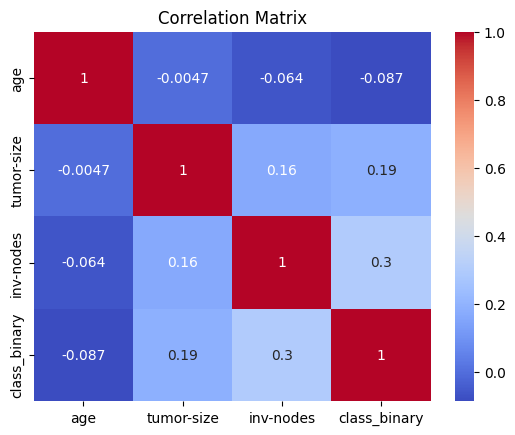

In [ ]:
###creates correlation matrix of numerical columns to compare to with class_binary column
correlation_matrix = df[['age', 'tumor-size', 'inv-nodes', 'class_binary']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

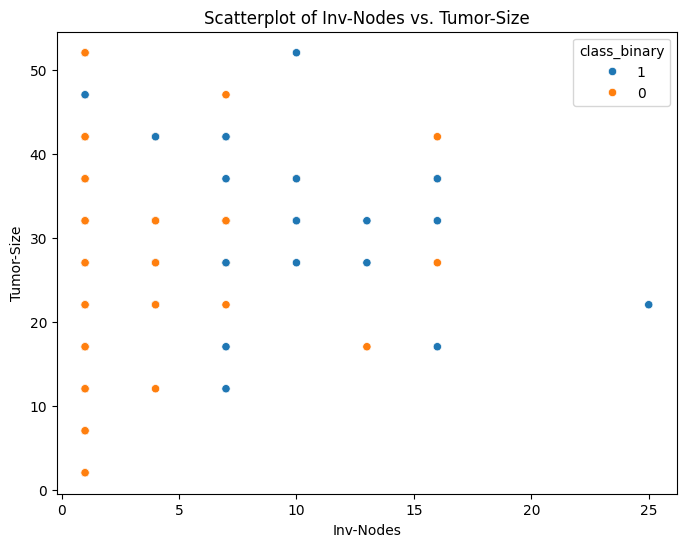

In [ ]:
###creates scatterplot of highest correlation between the two variables class_binary and inv-nodes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='inv-nodes', y='tumor-size', hue='class_binary')
plt.title('Scatterplot of Inv-Nodes vs. Tumor-Size')
plt.xlabel('Inv-Nodes')
plt.ylabel('Tumor-Size')
plt.show()

Observations


Correlation Matrix
* Age has a very weak negative correlation with ‘tumor size’ (-0.0047), ‘invasive nodes’ (-0.064), and ‘class_binary’ (-0.087), indicating that age has little to no influence on these factors
* ‘Tumor size’ exhibits a weak positive correlation with ‘invasive nodes’ (0.16) and ‘class_binary’ (0.19), suggesting that larger tumors may be slightly associated with a higher likelihood of positive classification and more invasive nodes
* Additionally, ‘invasive nodes’ have a moderate positive correlation with ‘class_binary’ (0.3), implying that a greater number of invasive nodes is somewhat linked to a positive classification
* Overall, the correlations are relatively low, indicating weak linear relationships between these variables.

Scatterplot
* When comparing the relationship between ‘tumor-size’ and ‘invasive-nodes,’ there is a slight positive relationship, more so for recurrent cancer cases. Generally, as ‘tumor-size’ increases the number of ‘inv-nodes’ also increases.




### Data Set Graphical Exploration

Create Probability Density Functions of Quantitative Variables


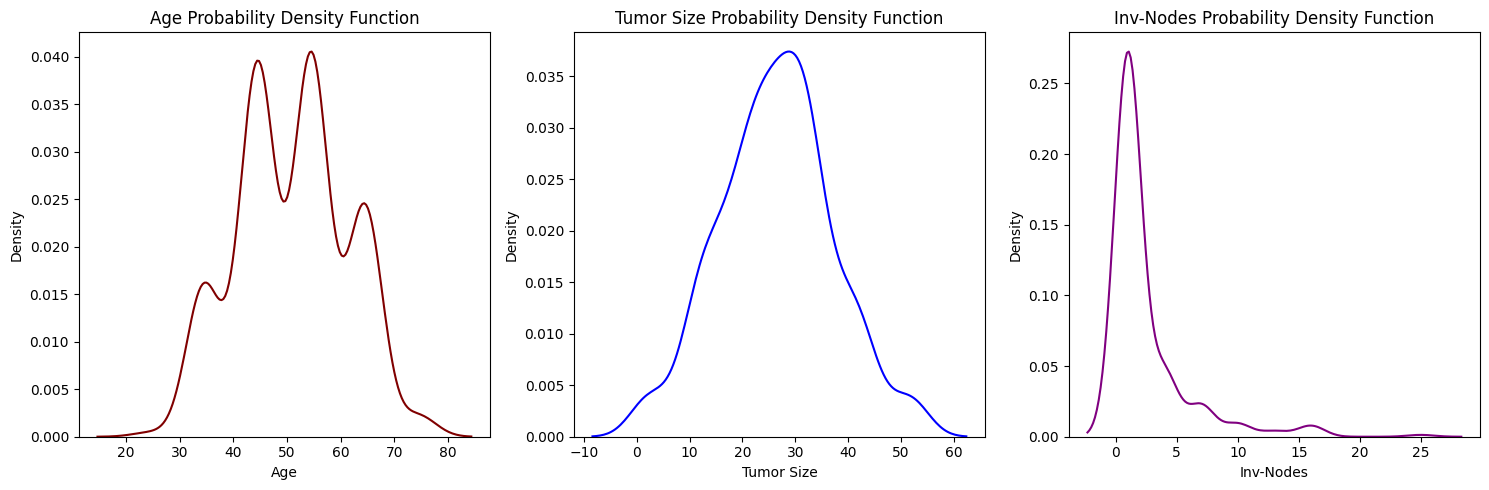

In [ ]:
###creates subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  ###1row, 3 columns

###converts relevant columns to numeric before plotting
for column in ['age', 'tumor-size', 'inv-nodes']:
    df[column] = pd.to_numeric(df[column])

###plots 'age' PDF
sns.kdeplot(df['age'], ax=axes[0],color='maroon')
axes[0].set_title('Age Probability Density Function')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

###plots 'tumor-size' PDF
sns.kdeplot(df['tumor-size'], ax=axes[1], color='blue')
axes[1].set_title('Tumor Size Probability Density Function')
axes[1].set_xlabel('Tumor Size')
axes[1].set_ylabel('Density')

###plots 'inv-nodes' PDF
sns.kdeplot(df['inv-nodes'], ax=axes[2], color='purple')
axes[2].set_title('Inv-Nodes Probability Density Function')
axes[2].set_xlabel('Inv-Nodes')
axes[2].set_ylabel('Density')

###adjusts layout and display
plt.tight_layout()
plt.show()

Create Bar Charts of All Categorical Variables

<ipython-input-30-105644f8494f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=ax, palette=sns.color_palette(color_palettes[i]))  # Use palette argument
<ipython-input-30-105644f8494f>:21: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(x=var, data=df, ax=ax, palette=sns.color_palette(color_palettes[i]))  # Use palette argument
<ipython-input-30-105644f8494f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=ax, palette=sns.color_palette(color_palettes[i]))  # Use palette argument
<ipython-input-30-105644f8494f>:21: UserWarning: The palette list has more values (8) than needed (2), wh

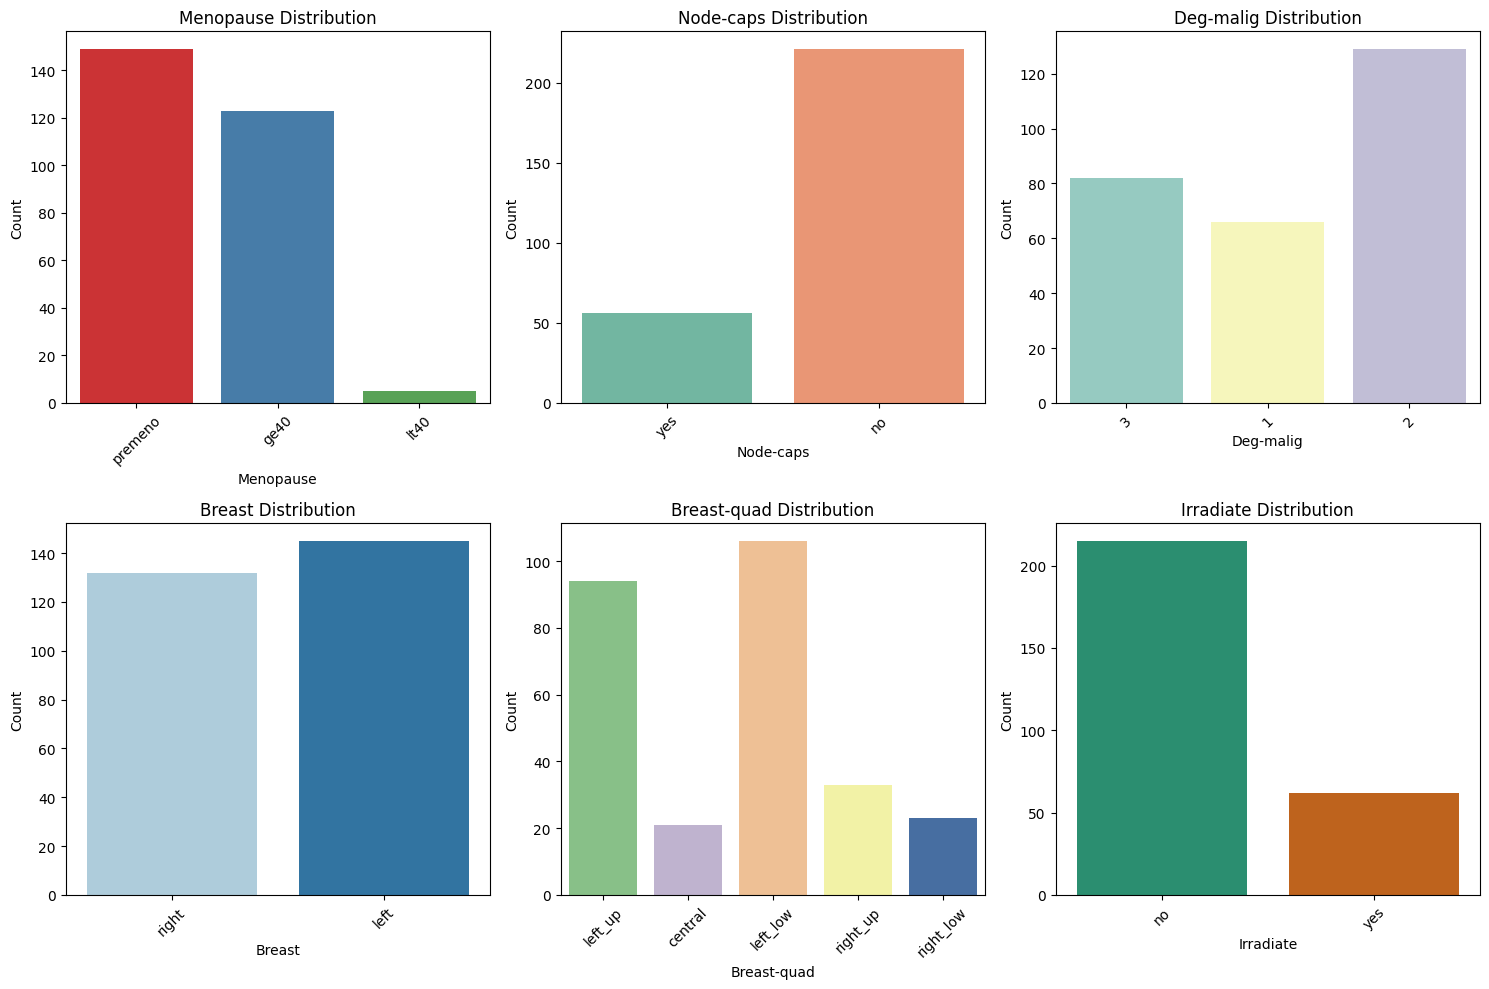

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  ###2 rows, 3 columns

###list of categorical variables
categorical_vars = ['menopause', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiate']

### Define a list of color palettes to use (one for each subplot)
color_palettes = [
    "Set1", "Set2", "Set3", "Paired", "Accent", "Dark2"  # Names of seaborn palettes
]

###iterates through variables and create bar plots
for i, var in enumerate(categorical_vars):
    row = i // 3  ###calculates row index
    col = i % 3   ###calculates column index
    ax = axes[row, col]  ###assigns subplot

    ###creates bar plots using seaborn's countplot with specified palette
    sns.countplot(x=var, data=df, ax=ax, palette=sns.color_palette(color_palettes[i]))  # Use palette argument

    ax.set_title(f'{var.capitalize()} Distribution')  ####sets title
    ax.set_xlabel(var.capitalize())  ###sets x-axis label
    ax.set_ylabel('Count')  ###sets y-axis label

    ###rotates x-axis labels if they are long
    ax.tick_params(axis='x', rotation=45)

###adjusts layout and display
plt.tight_layout()
plt.show()

#### Observations:

Probability Density Functions

*   The probability density functions for ‘age’ and ‘tumor-size’ exhibit relatively normal, unimodal distributions
* ‘Age’ was transformed from age ranges to the mean of each age range which is why there are significant slope changes in the distribution
* “Inv-nodes” has a right-skewed distribution which reflects the trend seen in healthcare as there are fewer patients with many invasive nodes

Bar Charts

* The distributions of qualitative variables is not entirely balanced especially for ‘irradiate’ and ‘node-caps’

Heatmap Comparing Breast Quadrant to Recurrence Proportions

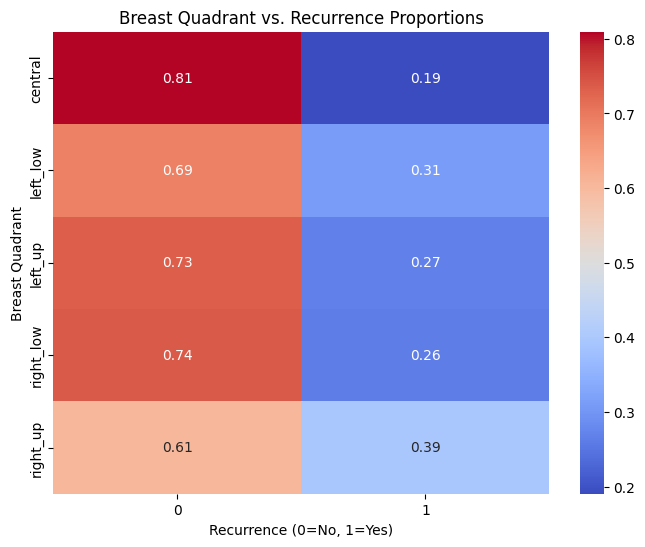

In [ ]:
###heatmap comparing breast quadrant to recurrence
###creates frequency table to be displayed by heatmap
quadrant_recurrence = pd.crosstab(index=df['breast-quad'], columns=df['class_binary'],normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(quadrant_recurrence, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Breast Quadrant vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Breast Quadrant")
plt.show()

Heatmap Comparing Degree of Malignancy to Recurrence Proportions

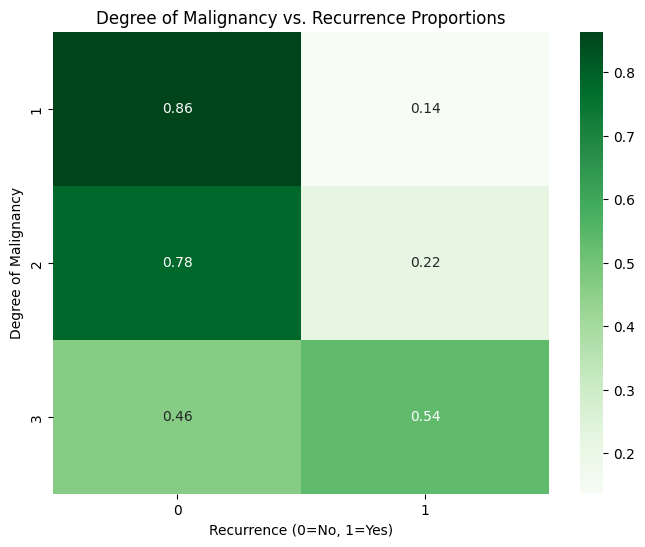

In [ ]:
###creates the cross-tabulation used to form the heatmap
deg_malig_recurrence = pd.crosstab(index=df['deg-malig'], columns=df['class_binary'], normalize='index')

###creates the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(deg_malig_recurrence, annot=True, fmt=".2f", cmap="Greens")
plt.title("Degree of Malignancy vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Degree of Malignancy")
plt.show()

Heatmap Comparing Menopause Status to Recurrence Proportions

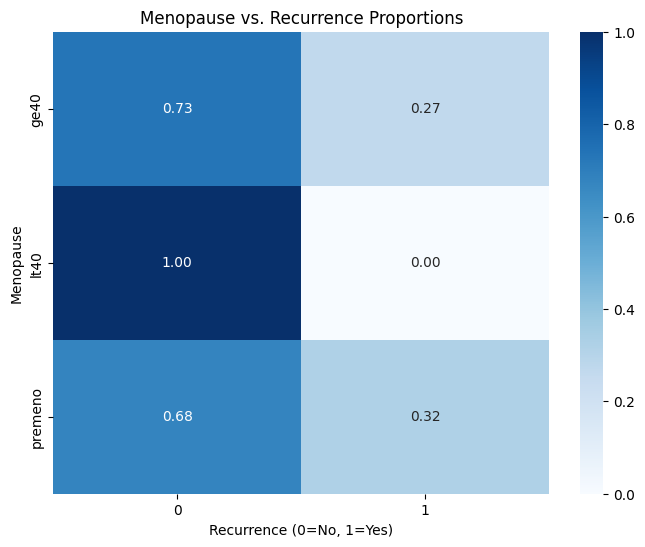

In [ ]:
###creates frequency table used to form the heatmap, normalizing by index (menopause)
menopause_recurrence = pd.crosstab(index=df['menopause'], columns=df['class_binary'], normalize='index')

###creates the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(menopause_recurrence, annot=True, fmt=".2f", cmap="Blues")
plt.title("Menopause vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Menopause")
plt.show()

#### Observations

Breast Quadrant vs. Recurrence Proportions

* Right upper and left lower breast cancer localization have the highest proportion of breast cancer recurrence

Degree of Malignancy vs. Recurrence Proportions

* Patients with 3rd degree malignancy have the highest rate of breast cancer recurrence

Menopause Status vs. Recurrence Proportions

* Patients who have not yet experienced menopause, ‘premeno,’ have the highest rate of cancer recurrence

### Conclusion:

The analysis explores the relationship between cancer recurrence and various factors using crosstabs, correlation matrices, and visualizations. Notably, no cases of cancer recurrence were recorded in patients who experienced menopause before the age of 40. Recurrence rates were higher in patients with left breast cancer, right upper tumor localization, and those who received radiation as part of their treatment. Correlation analysis revealed weak relationships between variables, with tumor size showing a slight positive correlation with invasive nodes and recurrence likelihood, while invasive nodes exhibited a moderate correlation with recurrence. Additionally, larger tumors were slightly associated with more invasive nodes, particularly in recurrent cases.  

The distributions of age and tumor size appeared relatively normal, whereas invasive nodes followed a right-skewed distribution, reflecting the typical trend in healthcare where fewer patients have a high number of invasive nodes. Despite some imbalance in qualitative variables such as 'irradiate' and 'node-caps,' the dataset remains sufficient for implementing machine learning models. Heatmaps further highlighted key trends, showing the highest recurrence rates in patients with right upper and left lower breast quadrants, those with 3rd-degree malignancy, and premenopausal individuals.
The dataset presents several issues that could impact a prediction system. Formatting inconsistencies include extra apostrophes in categorical values and hyphenated ranges in columns like `age`, `tumor-size`, and `inv-nodes`, which required transformation, through comprehensive functions, into numerical values. Missing data exists in `node-caps` and `breast-quad`, which was handled by removing these rows as to not impact the accuracy of predicting health trends. All columns are currently read as strings, though some were converted to numerical format. Categorical variables needed proper encoding—binary features like ‘class’ were mapped to 0/1. Additionally, potential class imbalance in the `class` column could bias the model, necessitating techniques like synthetic minority oversampling techniques (SMOTE) or under sampling. Addressing these issues will improve data quality and enhance the predictive accuracy of machine learning models.


## Preliminary Predictive Analytics Modeling

In [ ]:
#importing libraries necessary for preliminary predictive analytics model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#importing initial csv file containing the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_450_FinalProject/Processed_FinalProject_Data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Linear Regression Model/Baseline

Assumptions
*   Linearity: The dependent and independent variables should have a linear relationship, assessed via scatterplots.
* Multivariate Normality: Residuals should be normally distributed, checked using histograms, Q-Q plots, or statistical tests (e.g., Kolmogorov-Smirnov test).
* No Multicollinearity:
Independent variables should not be highly correlated.
Check correlation matrices (coefficients < 0.80) and Variance Inflation Factor (VIF < 10).
* Homoscedasticity:
Residual variance should be consistent across all levels of independent variables.
Patterns like a cone shape indicate heteroscedasticity, which may require data transformation or model adjustments.





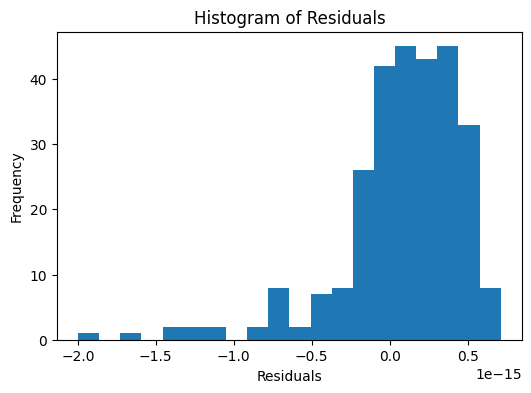

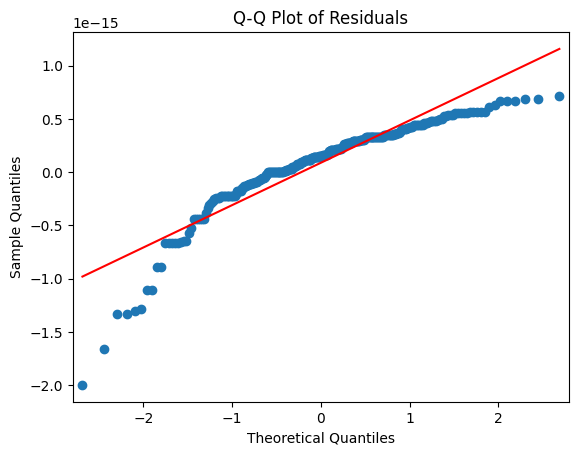

Kolmogorov-Smirnov test: statistic=0.49999999999999967, p-value=1.4656206167803036e-64


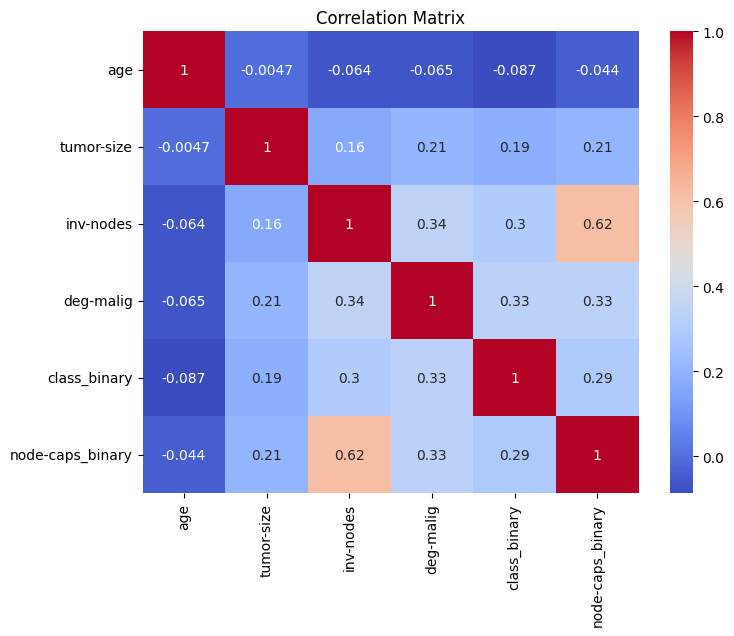

            feature       VIF
0               age  8.908938
1        tumor-size  7.008483
2         inv-nodes  2.607154
3         deg-malig  9.295852
4      class_binary  1.699600
5  node-caps_binary  2.103074


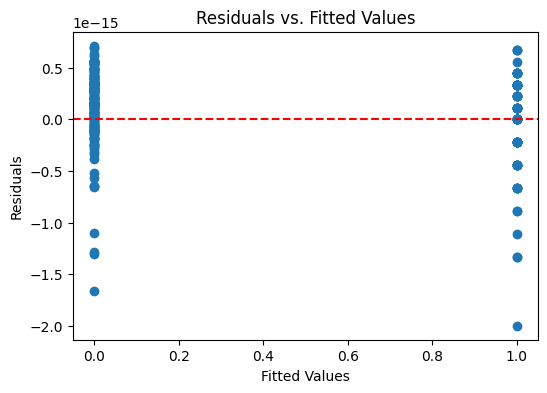

In [ ]:
# --- Assumption Checks ---
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame containing the data
X = df.select_dtypes(include=['number'])  # Select only numerical features for X
y = df['class_binary']  # Target variable

# Multivariate Normality
# Histogram and Q-Q plot of residuals
# Fit an OLS model to get residuals
X_with_const = sm.add_constant(X)  # Add constant for intercept
model_ols = sm.OLS(y, X_with_const).fit()
residuals = model_ols.resid

# Histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
ks_statistic, p_value = kstest(residuals, 'norm')
print(f"Kolmogorov-Smirnov test: statistic={ks_statistic}, p-value={p_value}")

# No Multicollinearity
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Homoscedasticity
# Residuals vs. Fitted values plot
plt.figure(figsize=(6, 4))
plt.scatter(model_ols.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()

Observations:
* assumptions have been satisfied for linear regression as confirmed by the visualizations and statistics above
* residuals appear to be random even though the values are binary

Linear Regression Using All Variables

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Separate features (X) and target (y)
X = df.drop('class_binary', axis=1)  # Features: all columns except 'class_binary'
y = df['class_binary']  # Target: 'class_binary'

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical features and transform them
categorical_features = X.select_dtypes(include=['object']).columns # Select categorical columns
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.18735643821250988
R-squared: 0.0007656628666139476


Linear Regression Using Only Numerical Variables

In [ ]:
# Separate features (X) and target (y)
X = df.select_dtypes(include=['number'])  # Select only numerical features
y = df['class_binary']  # Target: 'class_binary'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.110049302325527e-31
R-squared: 1.0


Linear Regression Function Finding Optimal Test_Size and Random_State

In [ ]:
X = df.select_dtypes(include=['number'])  # Select only numerical features
y = df['class_binary']  # Target: 'class_binary'

# Define ranges for test_size and random_state
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example test sizes
random_states = range(1, 51)  # Example random states from 1 to 50

best_score = -1  # Initialize with a low value
best_params = {}  # Store the best parameters

# Iterate through test_size and random_state values
for test_size in test_sizes:
    for random_state in random_states:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Create and train model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate model using cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        avg_score = scores.mean()

        # Update best score and parameters if current score is better
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'test_size': test_size, 'random_state': random_state}

# Print the best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best average R-squared: {best_score}")

# Train the final model using the best parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_params['test_size'], random_state=best_params['random_state'])
final_model = LinearRegression()
final_model.fit(X_train, y_train)

Best parameters: {'test_size': 0.1, 'random_state': 1}
Best average R-squared: 1.0


LinearRegression()

Observations (Linear Regression):
* when all variables are included, the R^2 drops drastically to ~0.00077, meaning the predictors collectively explain almost none of the variance in the target
* This could be a result of multicollinearity (high correlation between predictors), which makes it hard for the model to identify strong relationships
* Some important variables in the 3-variable model lose their predictive power when combined with others (interactions, nonlinear effects)


#### XGBoost


Assumptions:
* XGBoost may assume that encoded integer values for each input variable have an ordinal relationship
* XGBoost assume that your data may not be complete (i.e. it can deal with missing values)
* Categorical variables must be transformed into numeric variables because XGBoost only manages numeric vectors

In [ ]:
#install xgboost
!pip install xgboost==1.6.2
!pip install scikit-learn==1.3.2 # Downgrade scikit-learn

#import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score # Import precision, recall, f1
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for heatmap

#seperate features (x) and target (y)
X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',  # Use appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress during grid search
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set using the XGBoost model
# Change 'model' to 'best_xgb_model' for prediction
y_pred = best_xgb_model.predict(X_test)
y_pred_binary = [round(value) for value in y_pred] # Convert probabilities to binary predictions (0 or 1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct','Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'df' is not defined

XGBoost (w/ SMOTE)

In [ ]:
!pip install scikit-learn==1.3.2

import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters (you might need to tune these)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    # Add other parameters as needed
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct','Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observations (XGBoost):
* SMOTE did not yield any visible improvements to model performance
* Accuracy (0.80 or 80.4%)
The model correctly classifies 80.4% of all instances in the dataset.
However, accuracy alone can be misleading, especially since the dataset is imbalanced (the no cancer recurrence appears much more than the other).
* Precision (0.714 or 71.4%)
Precision = TP / (TP + FP) (true positives divided by all predicted positives). 71.4% precision means that when the model predicts the positive class, it is correct 71.4% of the time.
A relatively low precision suggests many false positives (incorrectly classifying negatives as positives).
* Recall (0.357 or 35.7%)
Recall = TP / (TP + FN) (true positives divided by all actual positives). 35.7% recall means the model only identifies 35.7% of actual positive cases, missing a significant portion.
A low recall indicates the model has many false negatives (failing to detect positives).
* F1 Score (0.476 or 47.6%)
The F1 score is the harmonic mean of precision and recall, balancing both.
A low F1 score (47.6%) suggests the model is not performing well at detecting the positive class.

#### Random Forest

Assumptions:
* Each tree makes its own decisions: Every tree in the forest makes its own predictions without relying on others
* Random parts of the data are used: Each tree is built using random samples and features to reduce mistakes
* Enough data is needed: Sufficient data ensures the trees are different and learn unique patterns and variety
* Different predictions improve accuracy: Combining the predictions from different trees leads to a more accurate final results

In [ ]:
#!pip install scikit-learn==1.3.0

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


# Separate features (X) and target (y)
X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct', 'Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature Importance Plot
importances = best_rf_model.feature_importances_
feature_names = X.columns  # Assuming X is your DataFrame with feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Cross-validation for more robust evaluation
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')  # You can change the scoring metric if needed
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0


ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

Random Forest (w/SMOTE)

In [ ]:
!pip install imbalanced-learn==0.11.0
!pip install scikit-learn==1.3.0

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can add hyperparameters here
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct', 'Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Visualize a single decision tree from the Random Forest
from sklearn.tree import plot_tree

# Extract a single tree from the forest (e.g., the first tree)
tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
# Convert X.columns (Pandas Index) to a Python list
plot_tree(tree, feature_names=list(X.columns), class_names=['No Recurrence', 'Recurrence'], filled=True, rounded=True)
plt.show()

Observations (Random Forest):
* SMOTE yields an improvement in recall and the F1 score but still could potentially be improved
* Accuracy (0.785 or 78.5%)
The model correctly classifies 78.5% of all instances in the dataset.
However, accuracy alone can be misleading, especially since the dataset is imbalanced (the no cancer recurrence appears much more than the other).
* Precision (0.666 or 66.6%)
Precision = TP / (TP + FP) (true positives divided by all predicted positives). 66.6% precision means that when the model predicts the positive class, it is correct 66.6% of the time.
A relatively low precision suggests many false positives (incorrectly classifying negatives as positives).
* Recall (0.286 or 28.6%)
Recall = TP / (TP + FN) (true positives divided by all actual positives). 28.6% recall means the model only identifies 28.6% of actual positive cases, missing a significant portion.
A low recall indicates the model has many false negatives (failing to detect positives).
* F1 Score (0.4 or 40%)
The F1 score is the harmonic mean of precision and recall, balancing both.
A low F1 score (40%) suggests the model is not performing well at detecting the positive class.

Cross-validation scores:

* Individual fold accuracies: 73.21%, 75%, 69.09%, 72.73%, 70.91%
Scores vary slightly, indicating stable performance across folds.
Average cross-validation score: 72.19%

* Shows consistent model performance on different data subsets.
Slightly lower than the test accuracy (78.57%), indicating potential overfitting.
Test accuracy: 78.57%

* Higher than the cross-validation average, suggesting some overfitting to the training data.

Feature Importance
* according to the random forest tree and feature importance bar chart, the most important features by decreasing importance are: inv-nodes, tumor-size, deg-malig, and age

#### Support Vector Machines (SVM)

Assumptions:
* It assumes data is independent and identically distributed


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Separate features (X) and target (y)
X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear',], #only using linear kernel due to computational limits
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_svm_model = SVC(random_state=42, **best_params)
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct', 'Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM (w/SMOTE)

In [ ]:
!pip install imbalanced-learn==0.11.0

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
X = df.drop('class_binary', axis=1)
y = df['class_binary']

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter optimization (adjust as needed)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],  # You can include other kernels if desired
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_svm_model = SVC(random_state=42, **best_params)
best_svm_model.fit(X_train_resampled, y_train_resampled)  # Use resampled data

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using matplotlib and seaborn for better visualization
plt.figure(figsize=(8, 6))
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=['Predicted Correct', 'Predicted Incorrect'],
            yticklabels=['Actual Correct', 'Actual Incorrect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observations (SVM):
* SMOTE leads to an improvement in recall but not an overall improvement in model performance
* Accuracy (0.679 or 67.9%)
The model correctly classifies 67.9% of all instances in the dataset.
However, accuracy alone can be misleading, especially since the dataset is imbalanced (the no cancer recurrence appears much more than the other).
* Precision (0.375 or 37.5%)
Precision = TP / (TP + FP) (true positives divided by all predicted positives). 37.5% precision means that when the model predicts the positive class, it is correct 66.6% of the time.
A relatively low precision suggests many false positives (incorrectly classifying negatives as positives).
* Recall (0.429 or 42.9%)
Recall = TP / (TP + FN) (true positives divided by all actual positives). 42.9% recall means the model only identifies 42.9% of actual positive cases, missing a significant portion.
A low recall indicates the model has many false negatives (failing to detect positives).
* F1 Score (0.4 or 40%)
The F1 score is the harmonic mean of precision and recall, balancing both.
A low F1 score (40%) suggests the model is not performing well at detecting the positive class.

#### Conclusion:
Among the three models evaluated (XGBoost, Random Forest, and SVM), XGBoost demonstrated the best overall performance in terms of accuracy (80.4%) and precision (71.4%). However, all models struggled with recall, indicating difficulty in correctly identifying actual cancer recurrence cases.

* XGBoost achieved the highest precision (71.4%) but had a low recall (35.7%), suggesting that while its positive predictions were relatively reliable, it missed a significant number of actual recurrence cases. The F1-score (47.6%) highlights this trade-off.
* Random Forest performed slightly worse in terms of accuracy (78.5%) and precision (66.6%) and had the lowest recall (28.6%), leading to an F1-score of 40%. Cross-validation results indicate some overfitting, with test accuracy (78.57%) exceeding the cross-validation average (72.19%).
* SVM had the lowest accuracy (67.9%), precision (37.5%), and F1-score (40%), but its recall (42.9%) was slightly better than the other models. This suggests it was somewhat better at identifying actual positive cases but generated too many false positives.

Key Takeaways:
* No model performed exceptionally well in recall, which is crucial for detecting cancer recurrence. A high number of false negatives could have severe consequences in a clinical setting.
* XGBoost was the best-performing model overall, balancing accuracy and precision, though it still struggled with recall.
* Random Forest showed some signs of overfitting, as indicated by the difference between cross-validation and test accuracy.
* SVM had the weakest performance across all metrics, making it the least favorable model for this task.